<a href="https://colab.research.google.com/github/Logeshn009/Computer-Vision-Lab-Programs/blob/main/2147120_CV_Lab_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

In [ ]:
!pip install opencv-python # OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Python code to read image
import cv2 #cv2 is the module import name for opencv-python
from google.colab.patches import cv2_imshow  # The function cv2 imshow() is used to add an image in the window. The window itself adjusts to the size of the image. 
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# reading the file

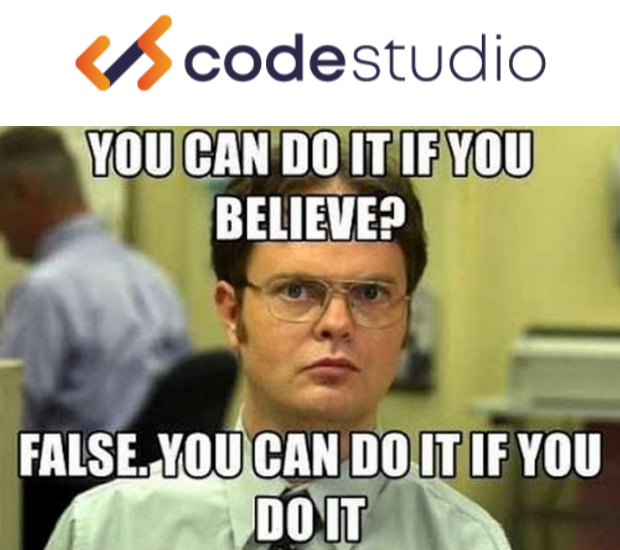

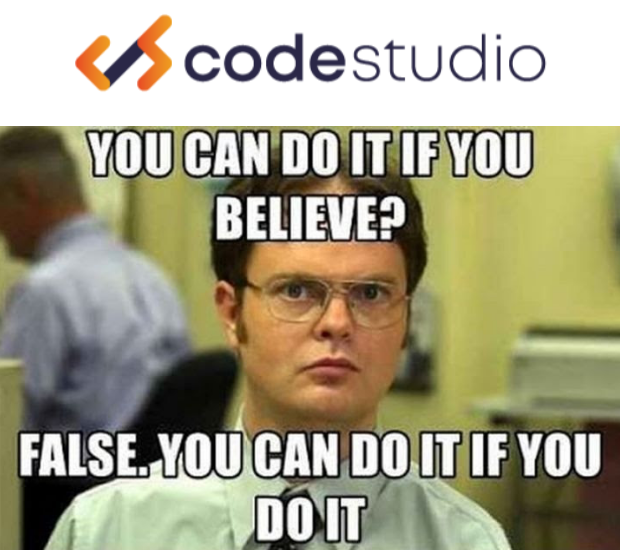

In [ ]:
# To read image from disk, we use
# cv2.imread function, in below method

img1 = cv2.imread("/content/motiv.png", cv2.IMREAD_COLOR)
img2 = cv2.imread('/content/motiv.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1) 
cv2_imshow(img2)

imread_color >>> If set, always convert image to the 3 channel BGR color image.

imread_unchanged >>> If set, return the loaded image as is (with alpha channel, otherwise it gets cropped). Ignore EXIF orientation.

In [ ]:
# imwrite operation the function imwrite saves the image to the specified file

cv2.imwrite('motiv.png',img1)

True

In [ ]:
image = Image.open('/content/motiv.png')
# Prints the name of the file
print("Filename: ", image.filename)
 
# Prints the format of the file
# Eg- PNG, JPG, GIF, etc.
print("Format: ", image.format)
 
# Prints the mode of the file
# Eg- RGB, RFBA, CMYK, etc.
print("Mode: ", image.mode)
 
# Prints the size as a width and height tuple (in pixels)
print("Size: ", image.size)
 
# Prints the width of the image (in pixels)
print("Width: ", image.width)
 
# Prints the height of the image (in pixels)
print("Height: ", image.height)

Filename:  /content/motiv.png
Format:  PNG
Mode:  RGB
Size:  (620, 550)
Width:  620
Height:  550


In [ ]:
# Specifying the RGB mode to the image
image = image.convert('RGB')
 
# Converting an image from jpeg to JPG format
image.save("converted-jpg-image.jpg")
print("jpg image successfully converted!")

image.save("converted-png-image.png")
print("png Image successfully converted!")

image.save("converted-png-image.gif")
print("gif Image successfully converted!")

image.save("converted-png-image.pdf")
print("PDF Image successfully converted!")

image.save("converted-png-image.tiff")
print("tiff Image successfully converted!")

jpg image successfully converted!
png Image successfully converted!
gif Image successfully converted!
PDF Image successfully converted!
tiff Image successfully converted!


# Lab 2 Convolution and correlation to a particular image in spatial domain

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Convolution method >> Filtering of a source image is achieved by convolving the kernel with the image. In simple terms, convolution of an image with a kernel represents a simple mathematical operation, between the kernel and its corresponding elements in the image.

Assume that the center of the kernel is positioned over a specific pixel (p), in an image.
Then multiply the value of each element in the kernel (1 in this case), with the corresponding pixel element (i.e. its pixel intensity) in the source image.
Now, sum the result of those multiplications and compute the average.
Finally, replace the value of pixel (p), with the average value you just computed.

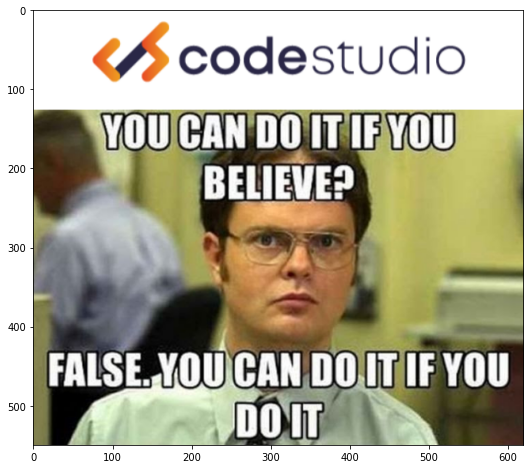

In [2]:
image = cv2.imread('/content/motiv.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

before you apply any convolution to an image, using a 2D-convolution matrix, you need to ensure that all the values are normalized. This is done by dividing each element of the kernel, by the number of elements in the kernel, which in this case is 9

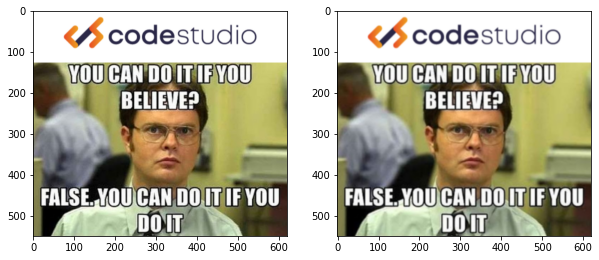

In [15]:
# box blur

abc=np.ones((3,3))
kernel = np.ones((3, 3), np.float32) / 9  # 32 bit floating point values hdr images use them
img = cv2.filter2D(image, -1, kernel)

# Syntax: filter2D (src, dst, ddepth, kernel)

# Parameters:  
# Src – The source image to apply the filter on.
# Dst – Name of the output image after applying the filter
# Ddepth – Depth of the output image [ -1 will give the output image depth as same as the input image]
# Kernel – The 2d matrix we want the image to convolve with.
fig, ax = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(image)
ax[1].imshow(img)

In [5]:
print(abc)
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


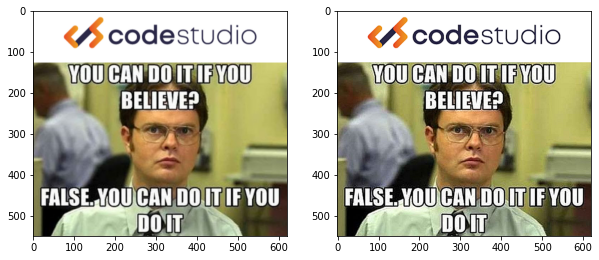

In [ ]:
# sharpening

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

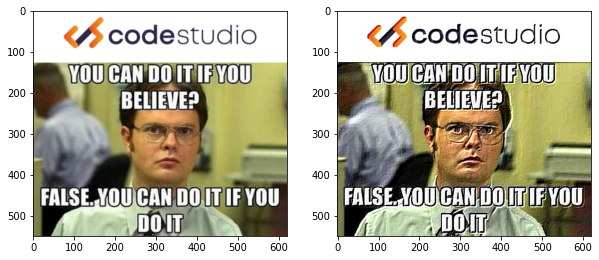

In [ ]:
# emboss

kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

In [ ]:
# Correlation

# read image
src = cv2.imread('/content/motiv.png')
# prepare averaging filter
kernel = np.ones((3, 3), dtype=np.float32)
kernel /= 9
# apply kernel to the original image
dst = cv2.filter2D(src, -1, kernel)
# concatenate images horizontally
result = np.concatenate((src, dst), axis=1)
cv2.imwrite('output.png', result)

True

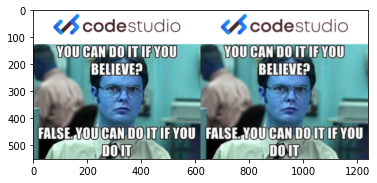

In [ ]:
image = cv2.imread('output.png')
plt.imshow(image)

In [ ]:
# read image
src = cv2.imread('/content/motiv.png')
# prepare the filter using identity kernel
kernel = [[0,0,0], [0,1,0], [0,0,0]]
# apply kernel to the original image
dst = cv2.filter2D(src, -1, np.array(kernel))
# concatenate images horizontally
result = np.concatenate((src, dst), axis=1)
cv2.imwrite('result.png', result)

True

Differentiate the above two methods and interpret your result

Correlation is an exact similarity measure between two functions K (the kernel, filter, or template) and S (the signal under test). It answers the questions, "(1) Where in the signal S are these two functions most similar, and (2) How similar are they at that point?" The similarity measure is computed at point t as the dot product of a copy of the kernel function translated by t with the signal under test.

Convolution is identical to correlation except that the kernel is flipped before correlation. Convolution is only a measure of similarity between two signals if the kernel is symmetric, making the problem equivalent to correlation. Convolution is useful because the flipping of a kernel in its definition makes convolution with a delta function equivalent to the identity function. When using a transform such as the Fourier transform to reconstruct a signal as a linear combination of some set of basis functions, this identity property is indispensable because the spatial continuity of the output signal with respect to the input signal is preserved (the system is causal), whereas correlation would output values in reverse order.

The Basic difference between Correlation and convolution is :-

Correlation is measurement of the similarity between two signals/sequences.

Convolution is measurement of effect of one signal on the other signal.

Write the Different applications of convolution and correlation

*convolution is used to compute the probability density function of a sum of two independent random variables (based on their probability density functions)

*convolution is used to find the common area between the two signals.

*correlation is used to find the comparison of two signals

*correlation is used to appreciate the stationarity of a random signal.

*Correlation is used as well in GPS systems for satellites' detection

# Lab 3 

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. 

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
path = "/content/lowcontrast.png"
img = cv2.imread(path)

In [10]:
# Using cv2.imwrite() method
# Saving the image
# Filename
filename = 'lowcontrast.png'
cv2.imwrite(filename, img)
newpath = '/content/lowcontrast.png'
newimg = cv2.imread(newpath)
src = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(src)

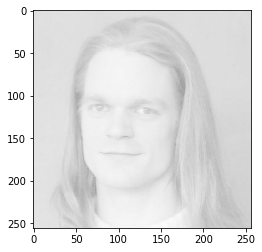

In [11]:
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

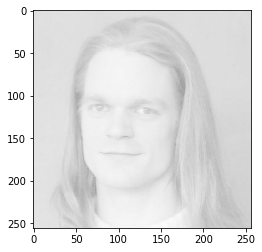

In [12]:
plt.imshow(newimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

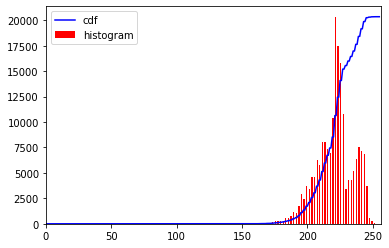

In [13]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

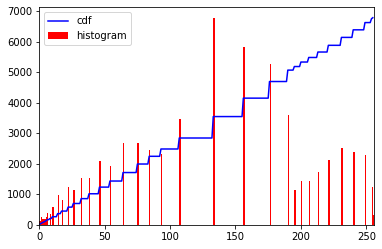

In [14]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()